![Redes Sociales](../redes_sociales_pythonperu.png)

# **💡 Mini proyecto robusto: Análisis de ventas por sucursal y categoría**

Simula que tienes el archivo ventas_sucursales.csv con datos de ventas de varias tiendas físicas y online.
Cada fila es una venta individual.



📊 Estructura del dataset

| Columna           | Descripción                                      |
| ----------------- | ------------------------------------------------ |
| `ID_Venta`        | Identificador único                              |
| `Fecha`           | Fecha de la venta                                |
| `Sucursal`        | Nombre de la sucursal                            |
| `Categoria`       | Categoría del producto                           |
| `Producto`        | Producto vendido                                 |
| `Cantidad`        | Unidades vendidas                                |
| `Precio_Unitario` | Precio por unidad                                |
| `Total`           | Total de la venta (`Cantidad * Precio_Unitario`) |


In [ ]:
import pandas as pd # manipulación de datos

In [2]:
# Lectura de datos
df = pd.read_csv('ventas_sucursales.csv')

In [3]:
# Visualización de mi tabla
df.head()

,ID_Venta,Fecha,Sucursal,Categoria,Producto,Cantidad,Precio_Unitario
0,1,2025-01-05,Centro,Laptops,HP Pavilion,1,750
1,2,2025-01-06,Centro,Accesorios,Mouse Logitech,2,25
2,3,2025-01-06,Norte,Telefonía,iPhone 14,1,1200
3,4,2025-01-07,Centro,Laptops,Dell Inspiron,1,680
4,5,2025-01-08,Sur,Telefonía,Samsung Galaxy S22,1,950


In [4]:
# Ver las dimensiones
df.shape

(50, 7)

In [5]:
# Ver la información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID_Venta         50 non-null     int64 
 1   Fecha            50 non-null     object
 2   Sucursal         50 non-null     object
 3   Categoria        50 non-null     object
 4   Producto         50 non-null     object
 5   Cantidad         50 non-null     int64 
 6   Precio_Unitario  50 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 2.9+ KB


In [6]:
df.isnull().sum()

ID_Venta           0
Fecha              0
Sucursal           0
Categoria          0
Producto           0
Cantidad           0
Precio_Unitario    0
dtype: int64

In [9]:
# Selecciona una columna
df['Precio_Unitario'].head()

0     750
1      25
2    1200
3     680
4     950
Name: Precio_Unitario, dtype: int64

In [10]:
# Agrega la columna Total
df['Total'] = df['Precio_Unitario'] * df['Cantidad']

In [11]:
df.head()

,ID_Venta,Fecha,Sucursal,Categoria,Producto,Cantidad,Precio_Unitario,Total
0,1,2025-01-05,Centro,Laptops,HP Pavilion,1,750,750
1,2,2025-01-06,Centro,Accesorios,Mouse Logitech,2,25,50
2,3,2025-01-06,Norte,Telefonía,iPhone 14,1,1200,1200
3,4,2025-01-07,Centro,Laptops,Dell Inspiron,1,680,680
4,5,2025-01-08,Sur,Telefonía,Samsung Galaxy S22,1,950,950


In [12]:
# Las columnas manejarlo en la convencion snake_case
df.columns = df.columns.str.strip().str.lower()

In [13]:
df.columns

Index(['id_venta', 'fecha', 'sucursal', 'categoria', 'producto', 'cantidad',
       'precio_unitario', 'total'],
      dtype='object')

- Estadística General

In [18]:
# Total vendido
suma_total = df['total'].sum()
print(f'Total General Vendido: S/{suma_total}')

Total General Vendido: S/26532


In [21]:
# Valores unicos de la columna Categoría
df['categoria'].unique()

array(['Laptops', 'Accesorios', 'Telefonía'], dtype=object)

In [20]:
# Valores únicos de la columna Sucursal
df['sucursal'].unique()

array(['Centro', 'Norte', 'Sur', 'Online'], dtype=object)

In [ ]:
# Venta promedio por sucursal
df.groupby('sucursal')['total'].mean().reset_index()

,sucursal,total
0,Centro,448.400000
1,Norte,633.666667
2,Online,681.454545
3,Sur,392.166667


<Axes: xlabel='sucursal'>

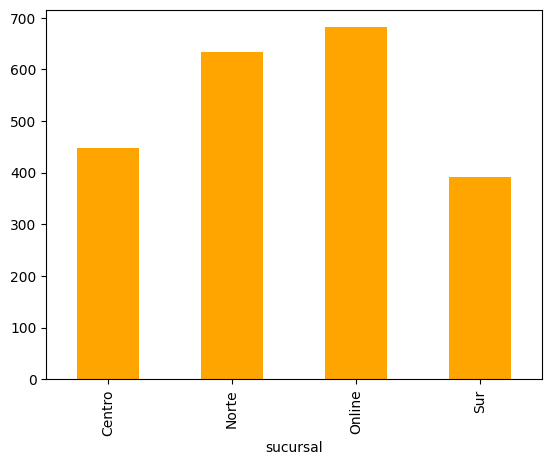

In [26]:
# Grafica de barras
ventas_sucursal = df.groupby('sucursal')['total'].mean()

ventas_sucursal.plot(kind = 'bar', color = 'orange')

In [28]:
df.groupby('sucursal')['total'].mean().sort_values(ascending = False)

sucursal
Online    681.454545
Norte     633.666667
Centro    448.400000
Sur       392.166667
Name: total, dtype: float64

In [30]:
# Categoría más vendida
df.groupby('categoria')['cantidad'].sum().sort_values(ascending=False)

categoria
Accesorios    44
Telefonía     21
Laptops       17
Name: cantidad, dtype: int64

<Axes: xlabel='categoria'>

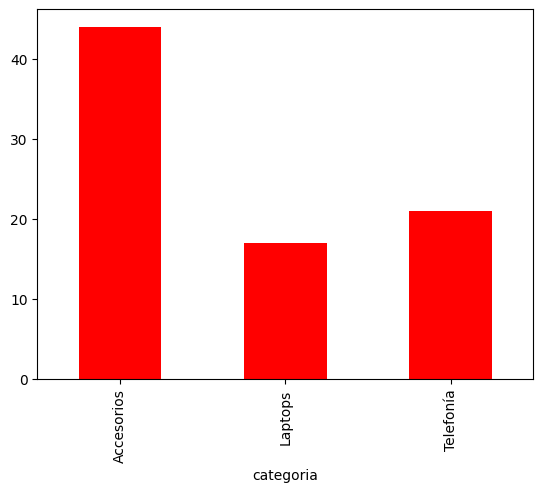

In [31]:
categoria_cantidad = df.groupby('categoria')['cantidad'].sum()
categoria_cantidad.plot(kind = 'bar', color ='red')

In [32]:
# Convertir las fechas (datetime)
df['fecha'] = pd.to_datetime(df['fecha'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_venta         50 non-null     int64         
 1   fecha            50 non-null     datetime64[ns]
 2   sucursal         50 non-null     object        
 3   categoria        50 non-null     object        
 4   producto         50 non-null     object        
 5   cantidad         50 non-null     int64         
 6   precio_unitario  50 non-null     int64         
 7   total            50 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 3.3+ KB


In [34]:
df.head()

,id_venta,fecha,sucursal,categoria,producto,cantidad,precio_unitario,total
0,1,2025-01-05,Centro,Laptops,HP Pavilion,1,750,750
1,2,2025-01-06,Centro,Accesorios,Mouse Logitech,2,25,50
2,3,2025-01-06,Norte,Telefonía,iPhone 14,1,1200,1200
3,4,2025-01-07,Centro,Laptops,Dell Inspiron,1,680,680
4,5,2025-01-08,Sur,Telefonía,Samsung Galaxy S22,1,950,950


In [36]:
df['fecha'].head()

0   2025-01-05
1   2025-01-06
2   2025-01-06
3   2025-01-07
4   2025-01-08
Name: fecha, dtype: datetime64[ns]

In [44]:
df.head()

,id_venta,fecha,sucursal,categoria,producto,cantidad,precio_unitario,total,mes
0,1,2025-01-05,Centro,Laptops,HP Pavilion,1,750,750,2025-01
1,2,2025-01-06,Centro,Accesorios,Mouse Logitech,2,25,50,2025-01
2,3,2025-01-06,Norte,Telefonía,iPhone 14,1,1200,1200,2025-01
3,4,2025-01-07,Centro,Laptops,Dell Inspiron,1,680,680,2025-01
4,5,2025-01-08,Sur,Telefonía,Samsung Galaxy S22,1,950,950,2025-01


In [43]:
# Evolución de ventas por mes
df['mes'] = df['fecha'].dt.to_period('M')


In [45]:
df.groupby('mes')['total'].sum()

mes
2025-01    17651
2025-02     8881
Freq: M, Name: total, dtype: int64

<Axes: xlabel='mes'>

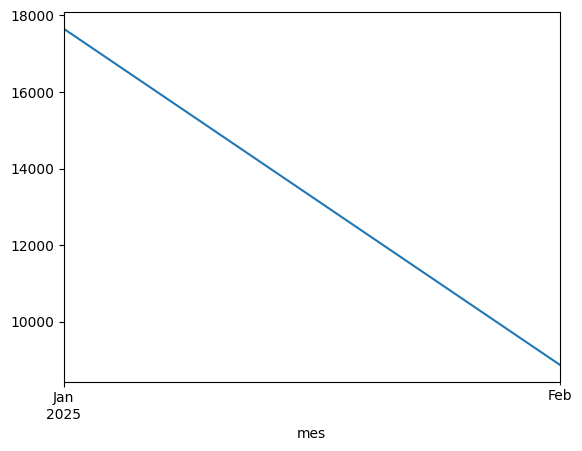

In [46]:
ventas_mes = df.groupby('mes')['total'].sum()
ventas_mes.plot(kind = 'line')

In [47]:
df.head()

,id_venta,fecha,sucursal,categoria,producto,cantidad,precio_unitario,total,mes
0,1,2025-01-05,Centro,Laptops,HP Pavilion,1,750,750,2025-01
1,2,2025-01-06,Centro,Accesorios,Mouse Logitech,2,25,50,2025-01
2,3,2025-01-06,Norte,Telefonía,iPhone 14,1,1200,1200,2025-01
3,4,2025-01-07,Centro,Laptops,Dell Inspiron,1,680,680,2025-01
4,5,2025-01-08,Sur,Telefonía,Samsung Galaxy S22,1,950,950,2025-01


In [48]:
# Guardar los resultados
resumen = df.groupby('sucursal')['total'].sum().reset_index()
resumen.head()

,sucursal,total
0,Centro,6726
1,Norte,7604
2,Online,7496
3,Sur,4706


In [49]:
resumen.to_csv('resumen_ventas_sucursal.csv', index = False)

In [50]:
df.to_csv('bdd_ventas_sucursal.csv', index=False)